In [ ]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [ ]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """

    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None

    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame>
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving insurance.xlsx to insurance.xlsx


In [ ]:
import pandas as pd

insurance = pd.read_excel("insurance.xlsx")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Correlation in Numerical Variables

In [ ]:
insurance[["age","bmi", "charges", "children"]].corr()


,age,bmi,charges,children
age,1.000000,0.109341,0.299008,0.042469
bmi,0.109341,1.000000,0.198576,0.012645
charges,0.299008,0.198576,1.000000,0.067998
children,0.042469,0.012645,0.067998,1.000000


The correlations between charges and age, charges and BMI, charges and children have positive linear correlation (have upward trends)
Age variable get the higher linear correlation to charges variable


**bold text** Average charge in each catagorical variabel

In [ ]:
insurance.groupby("sex")["charges"].mean()

sex
female    12569.578897
male      13956.751420
Name: charges, dtype: float64

In [ ]:
insurance.groupby("smoker")["charges"].mean()

smoker
no      8434.268449
yes    32050.231971
Name: charges, dtype: float64

In [ ]:
insurance.groupby("region")["charges"].mean()

region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: charges, dtype: float64

from the summaries, only smoker that have highest difference of charges within the category comparing to other categorical variables

Numerical Variables with each categorical variable


Numerical Variables with SEX

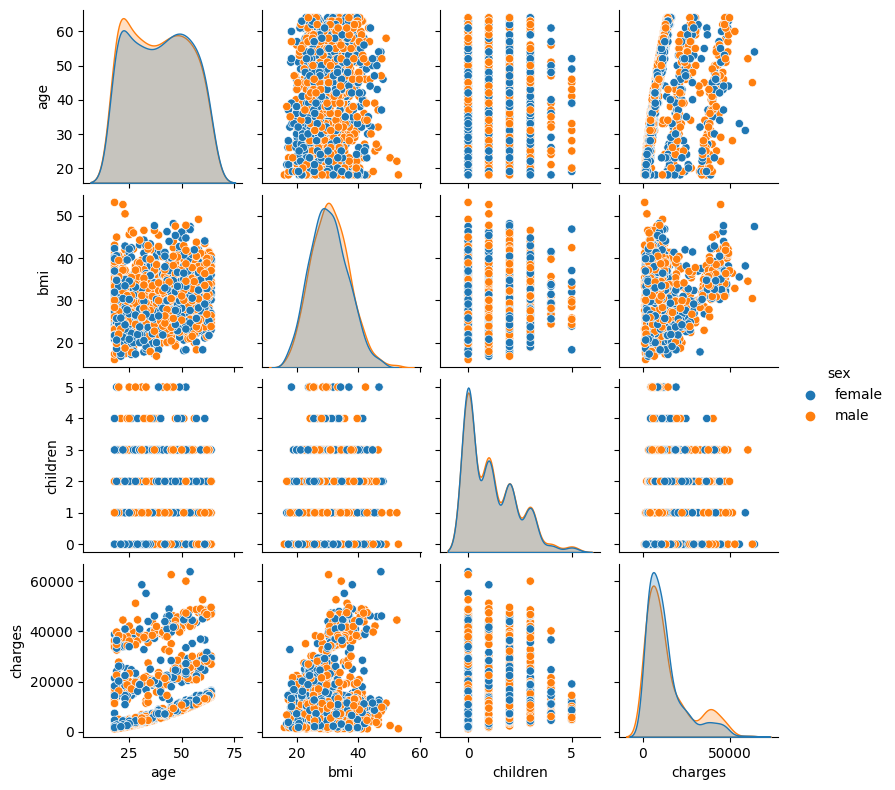

In [ ]:
sns.pairplot(data = insurance, hue = "sex", height=2)

Numerical Variables with Smoker

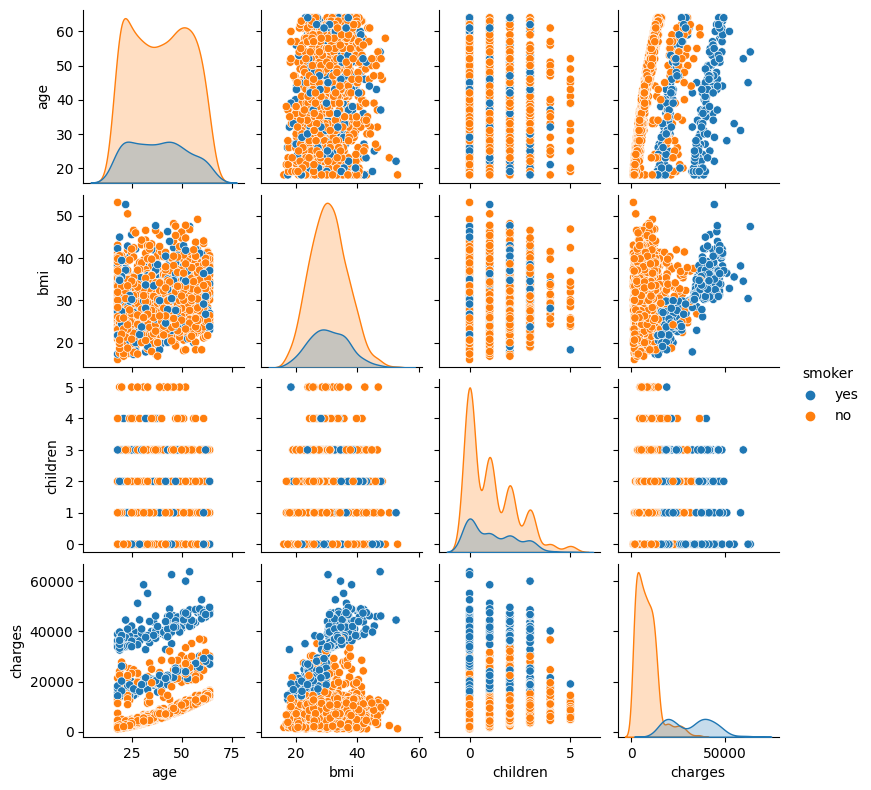

In [ ]:
sns.pairplot(data = insurance, hue = "smoker",height=2)


*   The plot shows that smoker have separate distribution of charges in each variables, mostly in age and bmi
*   The three line structure in age show the person who smoke is charging very high in comparison to person who does not smoke for same age
*   The person who smoke is charging very high in comparison to person who does not smoke for same bmi

Numerical Variable with Region

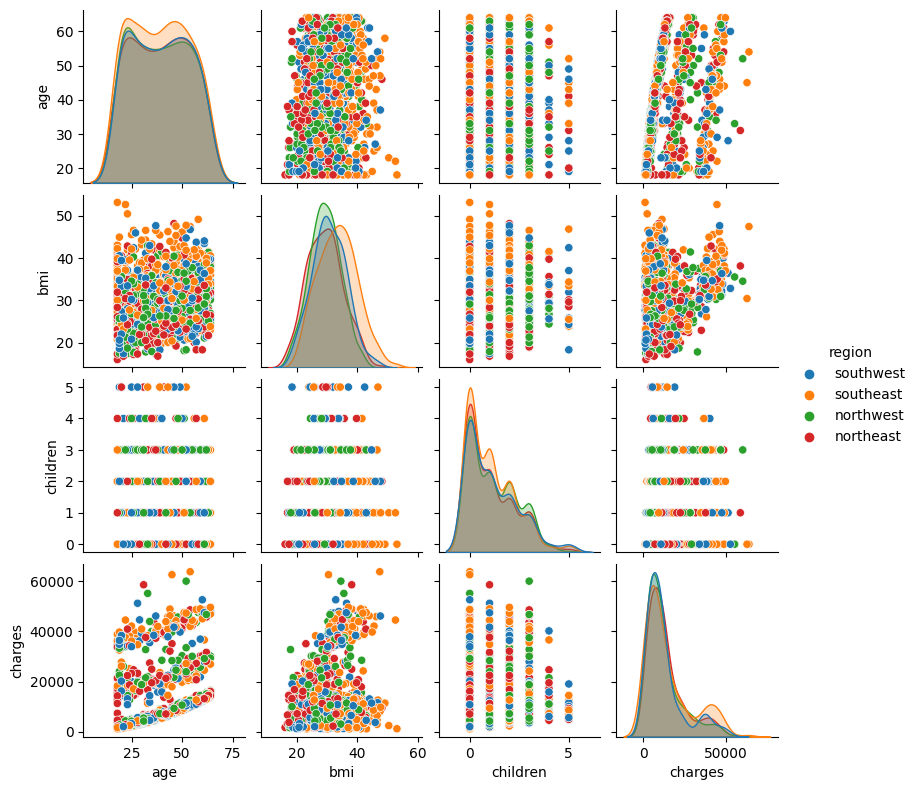

In [ ]:
sns.pairplot(data = insurance, hue = "region", height=2)

*   We cannot find any perticular relation between region and charge in each numerical variables

*   From the plot we see that the smoker reveal clear pattern to separate each age and bmi

So lets's try to build the model of
smoker + age
smoker + bmi
Evaluate which one that have highest explained variance


Modelling

Define The mmodel to fit the data

In [ ]:
# Create a class model

ols_bmi_smoker = StatsmodelsRegressor(smf.ols, "charges ~  bmi + smoker")
ols_age_smoker = StatsmodelsRegressor(smf.ols, "charges ~  age + smoker")

Performing Cross Validation


To calculate the explained variance as the performance of the model, use cross validation to have more generalized performance


Data Splitting Results

In [ ]:
fold_train, fold_test = kfold_split(data = insurance, n_fold = 5)

fold 1, train data rows: 1070, test data rows: 268
fold 2, train data rows: 1070, test data rows: 268
fold 3, train data rows: 1070, test data rows: 268
fold 4, train data rows: 1071, test data rows: 267
fold 5, train data rows: 1071, test data rows: 267


In [ ]:
fold_train[0]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1331,23,female,33.4,0,no,southwest,10795.94
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83


In [ ]:
fold_test[0]

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.7,0,no,southeast,3756.62
12,23,male,34.4,0,no,southwest,1826.84
13,56,female,39.8,0,no,southeast,11090.72
18,56,male,40.3,0,no,southwest,10602.39
28,23,male,17.4,1,no,northwest,2775.19
...,...,...,...,...,...,...,...
1309,41,male,32.2,2,no,southwest,6875.96
1312,34,male,42.9,1,no,southwest,4536.26
1326,42,female,32.9,0,no,northeast,7050.02
1332,52,female,44.7,3,no,southwest,11411.69


In [ ]:
# Create k-fold splitter object

kfold = KFold(n_splits=5, shuffle = True, random_state=123)

Calculate performance for each model


Regression model using BMI and Smoker variables

In [ ]:
scores_ols_bmi_smoker = cross_val_score(estimator = ols_bmi_smoker,
                                        X = insurance,
                                        y = insurance["charges"],
                                        cv = kfold,
                                        scoring = "r2")
scores_ols_bmi_smoker = pd.DataFrame(data = scores_ols_bmi_smoker, columns=["test_rsquared"])
scores_ols_bmi_smoker["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_bmi_smoker["test_rsquared"].mean()

0.6541004725875179

Regression model using age and smoker variables

In [ ]:
scores_ols_age_smoker = cross_val_score(estimator = ols_age_smoker,
                                        X = insurance,
                                        y = insurance["charges"],
                                        cv = kfold,
                                        scoring = "r2")
scores_ols_age_smoker = pd.DataFrame(data = scores_ols_age_smoker, columns=["test_rsquared"])
scores_ols_age_smoker["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_age_smoker["test_rsquared"].mean()

0.7193935986648288

The models with age and smoker variables achieves the highest R-squares

heres the performance ineach folds

In [ ]:
scores_ols_age_smoker

,test_rsquared,folds
0,0.772066,Folds 1
1,0.694421,Folds 2
2,0.718853,Folds 3
3,0.702628,Folds 4
4,0.708999,Folds 5


The cross validation score

In [ ]:
print(f"The average R-squared as cross validation score is {np.round(np.mean(scores_ols_age_smoker['test_rsquared']), 3)}")

The average R-squared as cross validation score is 0.719


Fitting the model in whole data to get the estimates coefficients

In [ ]:
# Centering Age to make intercept more interpretable
insurance["c_age"] = insurance["age"] - insurance ["age"].mean()

# Create OLS model object
model = smf.ols('charges ~  c_age + smoker', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ins = print_coef_std_err(results)
results_ins

,coef,std err
Intercept,8385.255362,196.117598
smoker[T.yes],23855.304804,433.488375
c_age,274.871185,12.455314


In [ ]:
# Explain variance of the final model

results.rsquared

0.7214008244366956

Charges = 8, 385+23,855 × Smoker_Condition + 275 × centered_Age

# Insights and Recommendation

After building the final model and get each estimated coefficient let's interpret and use the model for prediction to answer this question:

What are the top two variables that have the highest relationship with an individual's medical charges?
How much expected medical charges of a 25 year old male who dont smoke and have 0 children, 19.5 bmi and live in southwest?

# Prediction
Since our model only use two variables, we predict the expected medical charges using age and smoker variables only

In [ ]:
# store each estimate
intercept = results_ins["coef"]["Intercept"]
w_smoker = results_ins["coef"]["smoker[T.yes]"]
w_c_age = results_ins["coef"]["c_age"]

# input the individual data
age = 25
smoker = 0

# centering the age
c_age = age - insurance ["age"].mean()

# prediction
expected_charges = intercept + w_smoker*smoker + w_c_age*c_age
expected_charges

4480.153451082366

**Insight**

The two variables that have highest relation to medical charges is age and smoker variables.
the expected medical charges of people who don't smoke and have the average age is 8,385 dollar

Comparing people that have same age, people who smokes have higher medical charge by 23,855 dollar

Comparing people who have the same condition of smoking but differ 1 year old, the oldest people have 275 dollar higher medical charges in average than the youngest one
The model that have highest variance use age and smoker variables, it explained 72% of variance of medical charge
The model predict a 25 year old male who dont smoke have expected medical charges 4,480 dollar


**Recommendation**

Since the higher the risk of a claim, the higher the premium will be. One of the indicator of higher risk is higher medical charges history. From the model we have smoker and age variables as two indicator that contribute to expected medical charges

The insurance can give higher premi to people who smokes and older people since they might have higher risk compared other people

**Limitation**

The analysis taking into account only medical and demographics variables, insurance company may also consider broader factors such as market trends, regulatory requirements, and economic conditions when setting premium values.
